#### Visualizing the bounding box of the image using cv2 and plt library 

In [2]:
from pathlib import Path

In [3]:
import torch
import numpy as np
import cv2
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import glob
import os

In [4]:
import pandas as pd

In [21]:
load_path = Path(r'Z:\Projects\Angiogram\Data\Processed\Zijun\Synthetic\Sythetic_Output\UKR\001 (8)_R')

In [22]:
stenosis_infor = pd.read_csv(load_path / 'stenosis_infor.csv')

In [23]:
x_center = stenosis_infor.loc[0, 'x_center']
y_center = stenosis_infor.loc[0, 'y_center']
degree = stenosis_infor.loc[0, 'degree']
effect_region = stenosis_infor.loc[0, 'effect_region']

In [24]:
diameter = int((10+round(effect_region*100))/2)

In [25]:
box = [x_center-diameter, y_center-diameter, x_center+diameter, y_center+diameter]

In [34]:
stenosis_CLASSES = [0,1,2]
COLORS = np.random.uniform(0, 255, size=(len(stenosis_CLASSES), 3))

In [35]:
label_class_dict = dict(zip(stenosis_CLASSES, ['mild', 'severe']))

In [21]:
boxes = [box]
classes = [label_class_dict[degree]]
labels = [degree]

NameError: name 'label_class_dict' is not defined

In [37]:
def draw_boxes(boxes, classes, labels, image):
    """
    Draws the bounding box around a detected object.
    """
    lw = max(round(sum(image.shape) / 2 * 0.003), 2) # Line width.
    tf = max(lw - 1, 1) # Font thickness.
     
    for i, box in enumerate(boxes):
        p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
        color = COLORS[labels[i]]
        class_name = classes[i]
        cv2.rectangle(
            image,
            p1,
            p2,
            color[::-1],
            thickness=lw,
            lineType=cv2.LINE_AA
        )
        # For filled rectangle.
        w, h = cv2.getTextSize(
            class_name, 
            0, 
            fontScale=lw / 3, 
            thickness=tf
        )[0]  # Text width, height
         
        outside = p1[1] - h >= 3
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
         
        cv2.rectangle(
            image, 
            p1, 
            p2, 
            color=color[::-1], 
            thickness=-1, 
            lineType=cv2.LINE_AA
        )  
        cv2.putText(
            image, 
            class_name, 
            (p1[0], p1[1] - 5 if outside else p1[1] + h + 2),
            cv2.FONT_HERSHEY_SIMPLEX, 
            fontScale=lw / 3.8, 
            color=(255, 255, 255), 
            thickness=tf, 
            lineType=cv2.LINE_AA
        )
    return image

In [38]:
image = cv2.imread(str(load_path/'synthetic_1.png'))

In [39]:
image_add = draw_boxes(boxes, classes, labels, image)

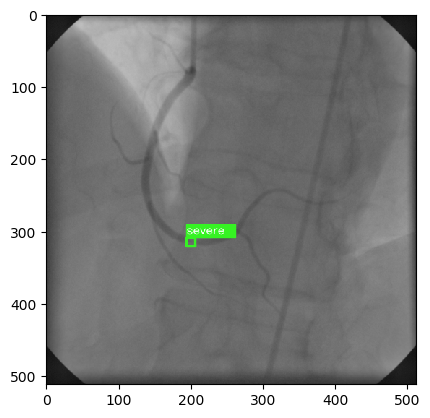

In [40]:
plt.imshow(image_add)

### Plot using torchvision

In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


ASSETS_DIRECTORY = "assets"

plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [2]:
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image

In [5]:
from pathlib import Path
import pandas as pd

In [6]:
load_path = Path(r'Z:\Projects\Angiogram\Data\Processed\Zijun\Synthetic\Sythetic_Output\UKR\001 (8)_R')

In [9]:
stenosis_infor = pd.read_csv(load_path / 'stenosis_infor.csv')

In [10]:
x_center = stenosis_infor.loc[0, 'x_center']
y_center = stenosis_infor.loc[0, 'y_center']
degree = stenosis_infor.loc[0, 'degree']
effect_region = stenosis_infor.loc[0, 'effect_region']

In [19]:
diameter = int((16+round(effect_region*100))/2)
box = torch.tensor([x_center-diameter, y_center-diameter, x_center+diameter, y_center+diameter]).unsqueeze(0)


In [48]:
box.shape

torch.Size([1, 4])

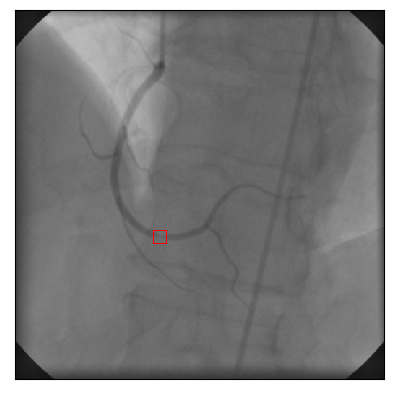

In [20]:
image = read_image(str(load_path/'synthetic_1.png'))
drawn_boxes = draw_bounding_boxes(image, box, colors="red")
show(drawn_boxes)

#### Load date and plot. Debug the dataset

In [72]:
from dataset import SyntheticImage

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
umr_dir=Path(r'Z:\Projects\Angiogram\Data\Processed\Zijun\Synthetic\Sythetic_Output\UoMR')
ukr_dir=Path(r'Z:\Projects\Angiogram\Data\Processed\Zijun\Synthetic\Sythetic_Output\UKR')
dir_list = [umr_dir, ukr_dir]
synthetic_image = SyntheticImage(dir_list)

In [74]:
synthetic_image.image_infor.loc[1, 'output_folder']

'Projects+Angiogram+Data+Processed+Zijun+Synthetic+Sythetic_Output+UoMR+1001-22_6'

In [75]:
synthetic_image[0]

(tensor(1),
 tensor([[249.5000, 412.5000, 269.5000, 432.5000]]),
 tensor([[[0.2235, 0.2196, 0.2196,  ..., 0.1529, 0.1451, 0.1451],
          [0.2196, 0.2235, 0.2235,  ..., 0.1490, 0.1412, 0.1490],
          [0.2196, 0.2235, 0.2275,  ..., 0.1490, 0.1412, 0.1569],
          ...,
          [0.1882, 0.1922, 0.2000,  ..., 0.1804, 0.1804, 0.1725],
          [0.1922, 0.1882, 0.2000,  ..., 0.1843, 0.1765, 0.1725],
          [0.1882, 0.1843, 0.1922,  ..., 0.1843, 0.1765, 0.1686]]]))